In [95]:
import os
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.stats import sem
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

In [96]:
folder = "/Volumes/guttman/Guoming_Gao-Resnick/TapeStation_Data/20250311-target enrichment buf test-nanopore barcode added"
fname = "250310-NANOPORE BARCODE-Q5TEST - 2025-03-11 - 18-59-53-HSD1000_Electropherogram.csv"
os.chdir(folder)
df = pd.read_csv(fname)

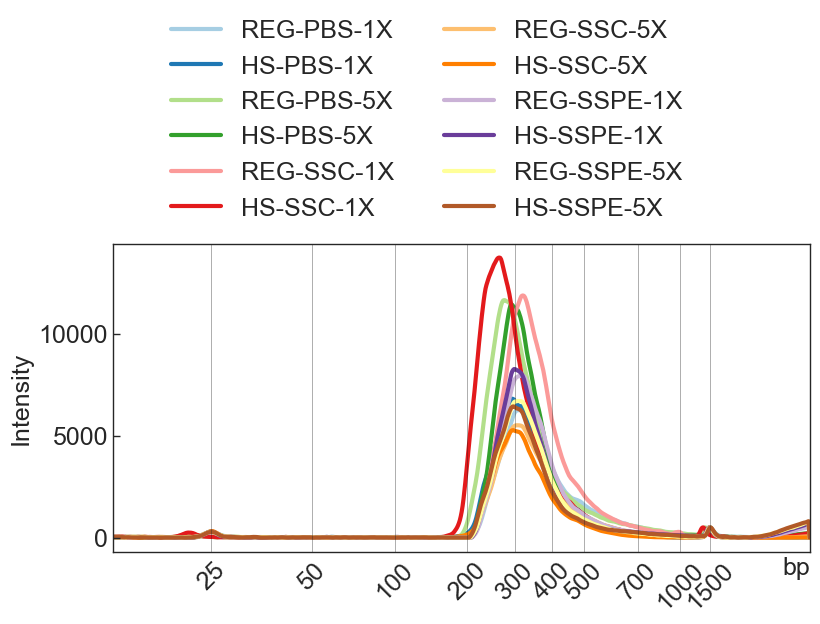

In [105]:
peaks, properties = find_peaks(
    df.iloc[:, 0],
    height=50,
)
peaks_bp = [25, 50, 100, 200, 300, 400, 500, 700, 1000, 1500]

plt.figure(figsize=(9, 4))
ax = sns.lineplot(
    data=df.iloc[:, 1:],
    palette=sns.color_palette("Paired"),
    lw=3,
    dashes=False,
)

sns.move_legend(
    ax,
    "upper center",
    bbox_to_anchor=(0.45, 1.8),
    ncol=2,
    title=None,
    frameon=False,
    fontsize=18,
)

for peak, bp in zip(peaks, peaks_bp):
    ax.axvline(peak, ls="-", c="k", alpha=0.5, lw=0.5)
    ax.annotate(
        str(bp),
        (peak, 0),
        xytext=(0, -15),
        textcoords="offset points",
        ha="center",
        va="top",
        fontsize=18,
        rotation=45,
    )

plt.xlim(0, df.shape[0])
# plt.ylim(0, 7)
ax.set_xlabel("bp", fontsize=18, loc="right")
plt.ylabel("Intensity", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Remove x-axis ticks and labels
ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.savefig("Electropherogram-pleaserename.png", format="png", bbox_inches="tight", dpi=300)